# Music Genre Classification Using KNN & Multi-class SVM

In this IPython Notebook, I'm going to train an AI to classify music genre into 10 different genres:
- blues
- classical
- country
- disco
- hiphop
- jazz
- metal
- pop
- reggae
- rock

The data to train and test the AI is from the GTZAN dataset (https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification?select=Data). I only used the features_3_sec.csv file to train the AI

I'm going to try 2 different methods in training the AI to find out which one is more efficient:
- KNN method (K-Nearest Neighbours)
- Multi-class SVM method (Support Vector Machines)

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns;

## **Data Cleaning & Splitting Train and Test Data**

In [2]:
data = pd.read_csv("features_3_sec.csv")

In [3]:
selected_columns = list(data.columns)
selected_columns.remove('filename')
selected_columns.remove('label')
clean_data = data[selected_columns]

In [4]:
scaler = preprocessing.MinMaxScaler()
clean_data_scaled = scaler.fit_transform(clean_data)

clean_data = pd.DataFrame(clean_data_scaled, columns = clean_data.columns)

In [5]:
clean_label = data['label']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(clean_data, clean_label, test_size=0.2, random_state=1)

## **Train Model with KNN Method**

When using KNN method, choosing the right K value is crucial. 3 methods to find the optimal K value:
- Cross Validation Method
- $K = \sqrt[2]{N} $
- Accuracy Plot (Bruteforce) Method

### - Find out optimal K with Cross Validation Method

In [7]:
test_score = list()


for k in range(1,50):
    knn_cross_val = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_cross_val, clean_data, clean_label)
    test_score.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

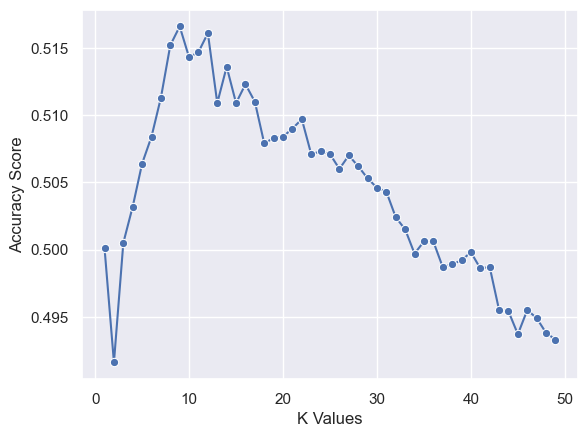

In [8]:
sns.lineplot(x = [i for i in range (1,50)], y = test_score, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [9]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, Y_train)
preds = knn.predict(X_test)
print(metrics.classification_report(preds,Y_test))

              precision    recall  f1-score   support

       blues       0.93      0.93      0.93       203
   classical       0.97      0.89      0.93       225
     country       0.83      0.82      0.83       216
       disco       0.90      0.79      0.84       201
      hiphop       0.81      0.92      0.86       187
        jazz       0.90      0.88      0.89       200
       metal       0.92      0.96      0.94       209
         pop       0.85      0.95      0.89       175
      reggae       0.88      0.83      0.86       211
        rock       0.80      0.84      0.82       171

    accuracy                           0.88      1998
   macro avg       0.88      0.88      0.88      1998
weighted avg       0.88      0.88      0.88      1998



With Cross Validation Method, the **optimal K value is 9**, with **accuracy score of 88%**
<br>
<br>

### - Find out optimal K with $K = \sqrt[2]{N}$ method

In [29]:
N = len(X_train) # N is total number of training data
K = round(N ** 0.5)
print("Optimal K value is: ", K)

Optimal K value is:  89


In [31]:
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, Y_train)
preds = knn.predict(X_test)
print(metrics.classification_report(preds,Y_test))

              precision    recall  f1-score   support

       blues       0.69      0.82      0.75       173
   classical       0.96      0.80      0.87       247
     country       0.65      0.64      0.64       217
       disco       0.73      0.49      0.59       261
      hiphop       0.49      0.87      0.63       119
        jazz       0.76      0.79      0.78       187
       metal       0.82      0.83      0.82       214
         pop       0.73      0.84      0.78       171
      reggae       0.71      0.61      0.66       232
        rock       0.58      0.59      0.59       177

    accuracy                           0.71      1998
   macro avg       0.71      0.73      0.71      1998
weighted avg       0.73      0.71      0.71      1998



With K = sqrt(N) Method, the **optimal K value is 89**, with **accuracy score of 71%**
<br>
<br>

### - Find out optimal K with Accuracy Plot (bruteforce) Method

In [12]:
test_error_rates = list()


for k in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, Y_train)
    
    y_pred = knn_model.predict(X_test)
    
    test_error = 1 - metrics.accuracy_score(Y_test,y_pred)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

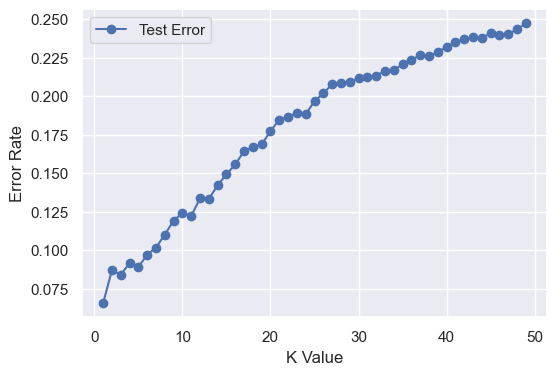

In [23]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(1,50),test_error_rates, marker = 'o',label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
preds = knn.predict(X_test)
print(metrics.classification_report(preds,Y_test))

              precision    recall  f1-score   support

       blues       0.98      0.88      0.93       225
   classical       0.96      0.92      0.94       216
     country       0.85      0.87      0.86       210
       disco       0.91      0.85      0.88       189
      hiphop       0.88      0.96      0.92       194
        jazz       0.94      0.90      0.92       203
       metal       0.96      0.98      0.97       215
         pop       0.90      0.97      0.93       182
      reggae       0.92      0.93      0.92       197
        rock       0.84      0.89      0.86       167

    accuracy                           0.91      1998
   macro avg       0.91      0.91      0.91      1998
weighted avg       0.92      0.91      0.91      1998



With Accuracy Plot (bruteforce) Method, the **optimal K value is 3 (without overfitting)**, with **accuracy score of 91%**
<br>
<br>

### **In summary, the best and most optimal K value is 3**

Text(110.44999999999997, 0.5, 'predicted label')

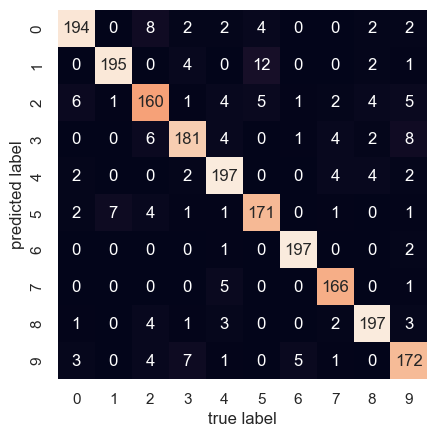

In [29]:
# confusion matrix of KNN method using K = 3
knn_mat = metrics.confusion_matrix(Y_test, preds)
sns.heatmap(knn_mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

## **Train Model with Multi-Class SVM Method**

Use 4 different kernels:
- Polynomial
- Sigmoid
- RBF
- Linear

In [19]:
svmPoly = SVC(kernel='poly')
svmSig = SVC(kernel='sigmoid')
svmRBF = SVC(kernel='rbf')
svmLin = SVC(kernel='linear')

In [20]:
svmPoly.fit(X_train, Y_train)
svmSig.fit(X_train, Y_train)
svmRBF.fit(X_train, Y_train)
svmLin.fit(X_train, Y_train)

SVC(kernel='linear')

In [24]:
polyPreds = svmPoly.predict(X_test)
sigPreds = svmSig.predict(X_test)
rbfPreds = svmRBF.predict(X_test)
linPreds = svmLin.predict(X_test)

In [27]:
test_error_poly = metrics.accuracy_score(Y_test, polyPreds)
test_error_sig = metrics.accuracy_score(Y_test, sigPreds)
test_error_rbf = metrics.accuracy_score(Y_test, rbfPreds)
test_error_lin = metrics.accuracy_score(Y_test, linPreds)

print("SVM with Polynomial kernel have accuracy score of:", round(test_error_poly, 2))
print("SVM with Sigmoid kernel have accuracy score of:", round(test_error_sig, 2))
print("SVM with RBF kernel have accuracy score of:", round(test_error_rbf, 2))
print("SVM with Linear kernel have accuracy score of:", round(test_error_lin, 2))

SVM with Polynomial kernel have accuracy score of: 0.81
SVM with Sigmoid kernel have accuracy score of: 0.17
SVM with RBF kernel have accuracy score of: 0.76
SVM with Linear kernel have accuracy score of: 0.73


### **In summary, the best kernel for SVM is using the Polynomial kernel**

In [28]:
print(metrics.classification_report(polyPreds,Y_test))

              precision    recall  f1-score   support

       blues       0.91      0.74      0.81       251
   classical       0.98      0.91      0.94       220
     country       0.70      0.77      0.74       195
       disco       0.79      0.71      0.75       197
      hiphop       0.74      0.90      0.81       174
        jazz       0.89      0.85      0.87       204
       metal       0.91      0.90      0.91       221
         pop       0.82      0.89      0.85       179
      reggae       0.73      0.78      0.75       188
        rock       0.62      0.66      0.64       169

    accuracy                           0.81      1998
   macro avg       0.81      0.81      0.81      1998
weighted avg       0.82      0.81      0.81      1998



Text(110.44999999999997, 0.5, 'predicted label')

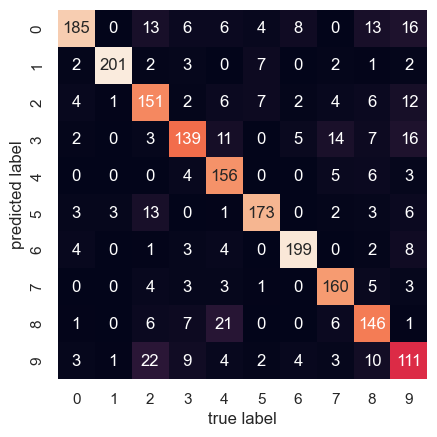

In [ ]:
# confusion matrix of SVM method using Polynomial Kernel
knn_mat = metrics.confusion_matrix(Y_test, polyPreds)
sns.heatmap(knn_mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

## **Summary**

**In summary, to classify music genre, KNN method is better compared to SVM method**. Using KNN, an accuracy score of 91% can be achieved, while using SVM, the best accuracy score is only 81%. However, the downside of using KNN is the value K. Using a different K value can directly affect the accuracy of the AI. Thus, when using KNN, finding the optimal K value is the most important part.